In [4]:
import numpy as np 

import cv2 

from matplotlib import pyplot as plt 

In [5]:
fichier = np.fromfile("F2.raw", np.uint8)

In [6]:
fichier = fichier.reshape((1080, 600, 1050))

In [7]:
img=fichier[400]

In [12]:
debruite = cv2.fastNlMeansDenoising(img, None, 20, 7, 21) 

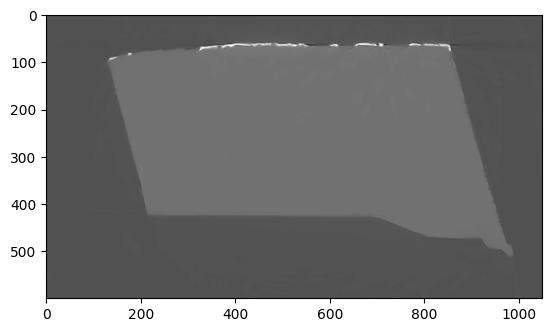

In [13]:
plt.imshow(debruite,cmap='gray')

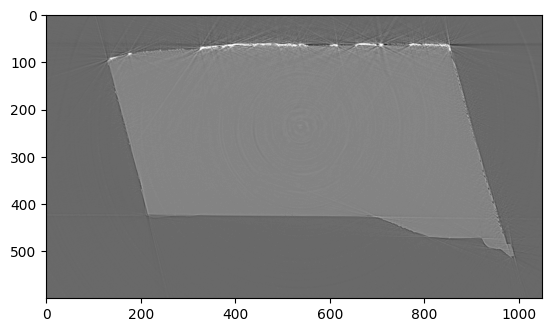

In [14]:
plt.imshow(img,cmap='gray')

In [20]:
def histogramme(img):
    histo=[0]*256
    for line in img:
        for pixel in line:
            histo[pixel]+=1
    plt.bar(range(256),histo)
    plt.show()
    
def histo(img):
    histo=[0]*256
    for line in img:
        for pixel in line:
            histo[pixel]+=1
    return np.array(histo)

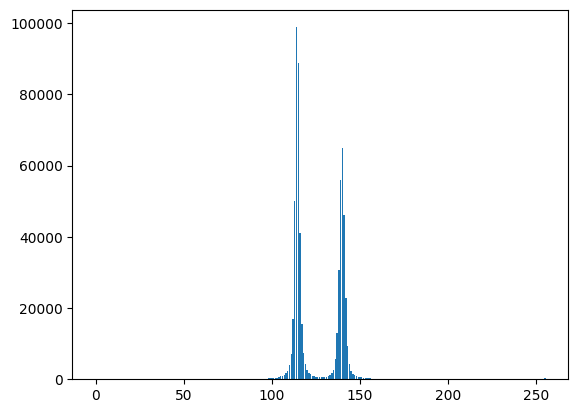

In [21]:
histogramme(img)

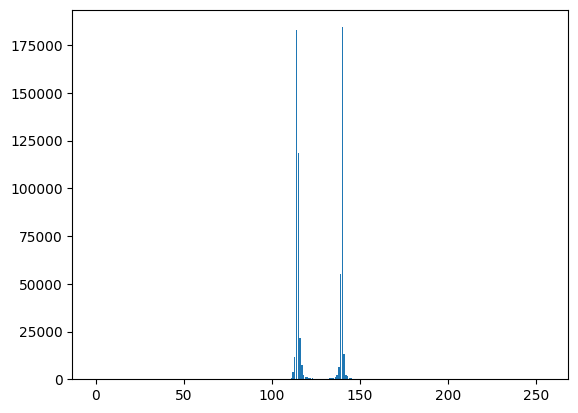

In [22]:
histogramme(debruite)

# Segmentation

In [25]:
def seg(img):
    hstg=histo(img)
    somme=sum(hstg)
    s=0
    for i,c in enumerate(hstg):
        s+=(i+1)*c
    s=s/somme
    return s

def image_segmente(img):
    mid=seg(img)
    
    n,m=len(img),len(img[0])
    
    r=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if img[i][j]>=mid:
                r[i][j]=255
            else:
                r[i][j]=0
    return r

126.72711111111111


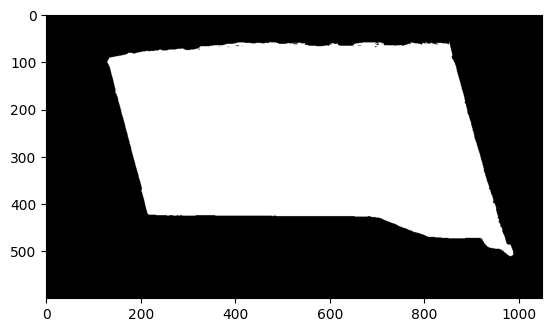

In [26]:
new_im=image_segmente(debruite)
plt.imshow(new_im,cmap='gray')

Resultat pour bruite

126.7615492063492


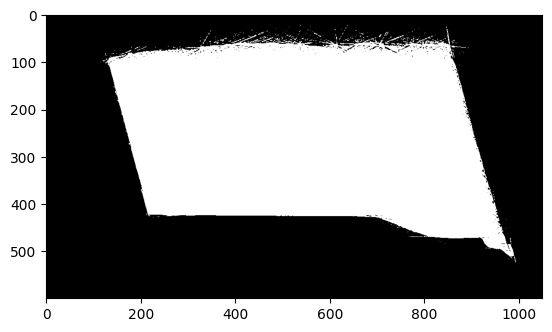

In [27]:
new_im2=image_segmente(img)
plt.imshow(new_im2,cmap='gray')